In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
image = cv2.imread('gray.jpeg', cv2.IMREAD_GRAYSCALE)
image = image / 255.0

In [ ]:
mean = np.mean(image, axis=0)
centered_data = image - mean
covariance_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

In [ ]:
# Sort eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

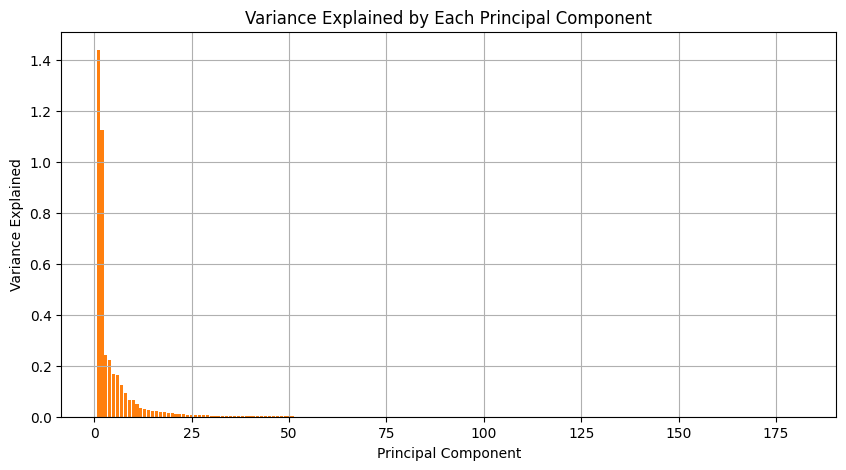

In [ ]:
explained_variance = eigenvalues

plt.figure(figsize=(10, 5))
indices = np.arange(1, len(explained_variance) + 1)
plt.bar(indices, explained_variance[indices - 1])
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.grid()
plt.show()


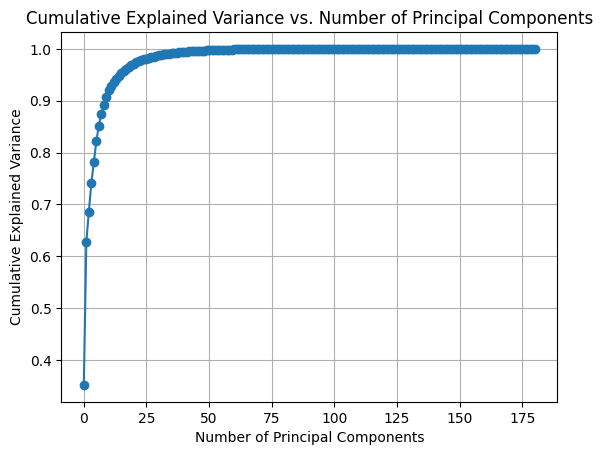

In [ ]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()

In [ ]:
k = 25  
eigenvectors = eigenvectors[:, :k]

In [ ]:
compressed_image = np.dot(centered_data, eigenvectors)
reconstructed_image = np.dot(compressed_image, eigenvectors.T) + mean


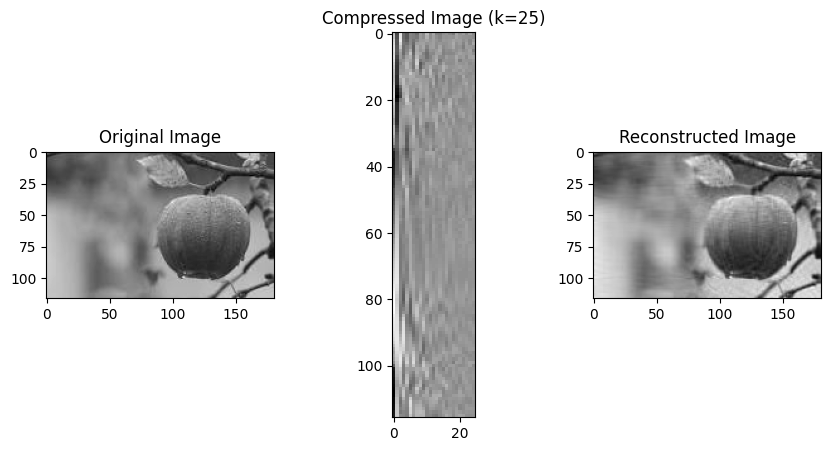

In [ ]:
# Rescale images to [0, 1]
reconstructed_image = np.clip(reconstructed_image, 0, 1)

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.title(f'Compressed Image (k={k})')
plt.imshow(compressed_image, cmap='gray')
plt.subplot(133)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image, cmap='gray')
plt.show()
